# **Image Clustering using K Means**


---



### **Import packages**

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

import numpy as np
import random


### **Read the CSV File**

In [ ]:
%cd /content/drive/MyDrive/cluster/

/content/drive/MyDrive/cluster


In [ ]:
# Import the CSV file into a DataFrame
data = pd.read_csv('finaldata.csv')

data


,ID,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,faces_0.jpg,0.033728,0.127126,0.000000,0.359298,0.358545,0.000000,0.888386,4.768355,0.003492,...,0.000000,0.166322,0.431783,2.788288,0.566119,0.000000,0.037890,0.004891,0.000000,0.498752
1,faces_1.jpg,0.063708,1.658228,0.000000,0.289223,0.504706,0.247978,0.259023,0.055343,0.099391,...,1.031182,0.115678,0.328300,1.479755,0.192384,0.089962,0.070508,0.802546,0.000000,1.009445
2,faces_10.jpg,0.079285,0.611215,0.000000,1.797892,0.000000,0.171410,0.122680,0.379873,0.226850,...,0.831470,0.118192,0.172015,0.058167,0.045496,0.000000,0.015875,0.105134,0.000000,0.084908
3,faces_100.jpg,0.004593,0.083291,0.236106,1.719218,0.166623,0.141124,0.975742,0.068876,0.009542,...,0.255955,0.283264,0.064188,2.255912,0.109671,0.000000,0.085526,0.203690,0.193915,0.443269
4,faces_1000.jpg,0.001451,0.100164,0.000000,2.022473,0.138275,0.030025,0.268721,0.040138,0.000000,...,0.052651,0.405755,0.028402,3.735830,0.000000,0.041718,0.047615,0.019141,0.003415,0.391058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,sketches_995.jpg,0.015154,0.052317,0.174623,0.000000,0.189515,0.139419,0.110769,0.065310,0.008371,...,0.000000,0.160876,0.004832,0.206515,0.000000,0.000000,3.064388,0.019915,0.000000,0.001013
11996,sketches_996.jpg,0.011793,1.219905,0.139041,0.000000,0.798767,0.030203,1.357340,0.404434,0.375017,...,0.000000,0.128799,0.000000,0.017562,0.105129,0.642977,0.720428,0.367981,0.091285,1.980403
11997,sketches_997.jpg,0.086502,0.090696,0.518850,0.005696,0.003759,0.077160,0.728361,0.065262,0.103829,...,0.107529,0.040551,0.000000,0.085805,0.000000,0.710757,0.468875,0.091102,0.287219,0.284792
11998,sketches_998.jpg,0.061287,0.006515,0.007254,0.079545,0.075042,0.000000,0.000000,0.422549,0.000000,...,0.000000,0.000000,0.001323,0.095776,0.342604,0.271305,0.453443,0.177984,0.185308,1.260863


### **Preparing Feature list and class variable**

In [ ]:
feature_data=data.iloc[:, 1:2049]
result=data.iloc[:, :1]

In [ ]:
feature_data

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.033728,0.127126,0.000000,0.359298,0.358545,0.000000,0.888386,4.768355,0.003492,0.014640,...,0.000000,0.166322,0.431783,2.788288,0.566119,0.000000,0.037890,0.004891,0.000000,0.498752
1,0.063708,1.658228,0.000000,0.289223,0.504706,0.247978,0.259023,0.055343,0.099391,0.040310,...,1.031182,0.115678,0.328300,1.479755,0.192384,0.089962,0.070508,0.802546,0.000000,1.009445
2,0.079285,0.611215,0.000000,1.797892,0.000000,0.171410,0.122680,0.379873,0.226850,0.109286,...,0.831470,0.118192,0.172015,0.058167,0.045496,0.000000,0.015875,0.105134,0.000000,0.084908
3,0.004593,0.083291,0.236106,1.719218,0.166623,0.141124,0.975742,0.068876,0.009542,0.093503,...,0.255955,0.283264,0.064188,2.255912,0.109671,0.000000,0.085526,0.203690,0.193915,0.443269
4,0.001451,0.100164,0.000000,2.022473,0.138275,0.030025,0.268721,0.040138,0.000000,0.308759,...,0.052651,0.405755,0.028402,3.735830,0.000000,0.041718,0.047615,0.019141,0.003415,0.391058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.015154,0.052317,0.174623,0.000000,0.189515,0.139419,0.110769,0.065310,0.008371,0.073455,...,0.000000,0.160876,0.004832,0.206515,0.000000,0.000000,3.064388,0.019915,0.000000,0.001013
11996,0.011793,1.219905,0.139041,0.000000,0.798767,0.030203,1.357340,0.404434,0.375017,0.008356,...,0.000000,0.128799,0.000000,0.017562,0.105129,0.642977,0.720428,0.367981,0.091285,1.980403
11997,0.086502,0.090696,0.518850,0.005696,0.003759,0.077160,0.728361,0.065262,0.103829,0.000000,...,0.107529,0.040551,0.000000,0.085805,0.000000,0.710757,0.468875,0.091102,0.287219,0.284792
11998,0.061287,0.006515,0.007254,0.079545,0.075042,0.000000,0.000000,0.422549,0.000000,0.000000,...,0.000000,0.000000,0.001323,0.095776,0.342604,0.271305,0.453443,0.177984,0.185308,1.260863


In [ ]:
result

,ID
0,faces_0.jpg
1,faces_1.jpg
2,faces_10.jpg
3,faces_100.jpg
4,faces_1000.jpg
...,...
11995,sketches_995.jpg
11996,sketches_996.jpg
11997,sketches_997.jpg
11998,sketches_998.jpg


### **Elbow Method to find out the number of clusters**

In [ ]:
X = np.random.rand(100, 2)

K = range(5, 21)

inertias = []
for k in K:
  print("Cluster ",k)
  model = KMeans(n_clusters=k,n_init=10)
  model.fit(feature_data)
  inertias.append(model.inertia_)

Cluster  5
Cluster  6
Cluster  7
Cluster  8
Cluster  9
Cluster  10
Cluster  11
Cluster  12
Cluster  13
Cluster  14
Cluster  15
Cluster  16
Cluster  17
Cluster  18
Cluster  19
Cluster  20


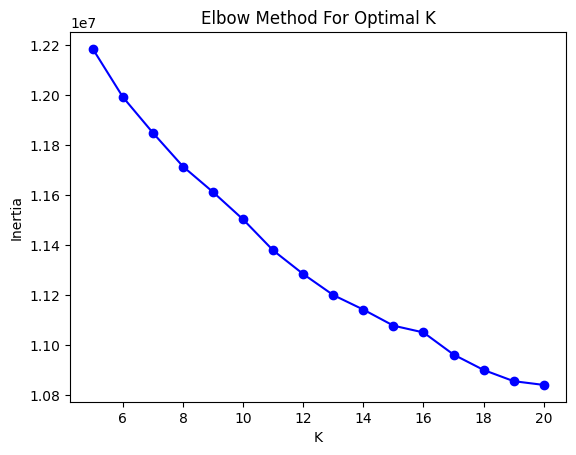

In [ ]:
# Plot the elbow curve
plt.plot(K, inertias, 'bo-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

### **K Means Scratch Code**

In [ ]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters=8, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        
    def fit(self, X):
        n_samples, n_features = X.shape
        
        # Initialize cluster centroids randomly
        self.centroids = X[np.random.choice(n_samples, self.n_clusters, replace=False)]
        
        # Iterate until convergence or max_iter is reached
        for i in range(self.max_iter):
            # Assign each data point to the closest cluster centroid
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)
            
            # Update the cluster centroids
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.n_clusters)])
            
            # Check for convergence
            if np.abs(self.centroids - new_centroids).max() < self.tol:
                break
            
            self.centroids = new_centroids
        
        self.labels = labels
    
    def predict(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        return labels


### **Performing K Means on the cluster Obtained**

In [ ]:
count=20

In [ ]:


kmeans = KMeans(n_clusters=count)

# Fit the model to the data
kmeans.fit(feature_data)

# Add the cluster labels to the DataFrame
result['cluster'] = kmeans.labels_


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-8-fe6bce45d159>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['cluster'] = kmeans.labels_


In [ ]:
result.head(10)

,ID,cluster
0,faces_0.jpg,3
1,faces_1.jpg,3
2,faces_10.jpg,3
3,faces_100.jpg,10
4,faces_1000.jpg,10
5,faces_1001.jpg,10
6,faces_1002.jpg,10
7,faces_1003.jpg,8
8,faces_1004.jpg,8
9,faces_1005.jpg,8


### **Result Analysis**

In [ ]:
def evaluate(c):
  cluster = result[result['cluster'] == c]
  names=list(cluster['ID'])
  res={'products': 0, 'objects': 0, 'sketches': 0, 'landmarks': 0, 'nature': 0, 'faces': 0}

  for val in names:
    x=val.split("_")[0]
    if x in res.keys():
      res[x]+=1
    else:
      res[x]=1
  sorted_dict = sorted(res.items(), key=lambda x: x[1], reverse=True)
  newres={}
  reslist=[c]
  for key, value in sorted_dict:
    newres[key]=value
  reslist.append(newres)

  metric=max(newres.values())/sum(newres.values())
  reslist.append(metric)
  print(reslist)
  return metric

In [ ]:
metric_list=[]
for i in range(count):
  metric_list.append(evaluate(i))
print()
print("Overall Saturation in clustering:",sum(metric_list)/len(metric_list)*100)

[0, {'landmarks': 246, 'objects': 236, 'products': 31, 'nature': 5, 'faces': 3, 'sketches': 1}, 0.47126436781609193]
[1, {'products': 384, 'objects': 3, 'sketches': 0, 'landmarks': 0, 'nature': 0, 'faces': 0}, 0.9922480620155039]
[2, {'landmarks': 438, 'sketches': 33, 'objects': 2, 'products': 0, 'nature': 0, 'faces': 0}, 0.9260042283298098]
[3, {'faces': 833, 'landmarks': 2, 'objects': 1, 'products': 0, 'sketches': 0, 'nature': 0}, 0.9964114832535885]
[4, {'sketches': 731, 'objects': 6, 'nature': 6, 'products': 1, 'landmarks': 1, 'faces': 0}, 0.9812080536912752]
[5, {'objects': 565, 'products': 52, 'nature': 15, 'sketches': 2, 'landmarks': 1, 'faces': 1}, 0.8883647798742138]
[6, {'nature': 554, 'objects': 17, 'products': 7, 'landmarks': 1, 'sketches': 0, 'faces': 0}, 0.9568221070811744]
[7, {'sketches': 1101, 'objects': 14, 'products': 7, 'landmarks': 0, 'nature': 0, 'faces': 0}, 0.9812834224598931]
[8, {'faces': 576, 'objects': 11, 'sketches': 2, 'products': 1, 'landmarks': 0, 'natur

### **Live Data Prediction**

In [ ]:
test = pd.read_csv('test.csv')

test

,ID,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,face_01.jpg,0.000000,0.872209,0.039002,0.292832,0.272305,0.000000,0.592422,0.301147,0.000000,...,0.016901,0.029633,0.430678,1.657364,0.263351,0.000000,0.454691,0.079797,0.000000,0.000000
1,face_02.jpg,0.087929,0.161309,0.210914,2.424318,0.437031,0.065286,0.528965,0.000958,0.009348,...,0.004893,0.953873,0.078955,2.197888,0.401338,0.001726,0.017133,0.137356,0.544384,0.111802
2,landmarks_01.jpg,0.813678,0.660639,0.022272,0.075718,0.000000,0.033448,0.003867,0.000000,1.039667,...,0.000000,0.407416,0.236862,1.700322,0.084692,0.000000,2.191882,0.175202,0.038702,0.056168
3,nature_90.jpg,0.018441,1.614720,0.000000,0.009208,0.000000,0.412262,0.000000,0.000000,0.130425,...,0.091295,0.018678,0.056240,1.995276,0.000000,0.000000,0.003182,0.092717,0.000000,0.175933
4,nature_o1.jpg,4.959870,0.041183,0.898949,0.355113,0.064532,0.033412,0.302659,2.284854,0.000000,...,1.103172,0.821600,0.023411,0.009702,0.257166,0.294496,0.000000,0.329179,0.211649,1.182468
5,sketch_01.jpg,0.712796,0.402339,0.000000,0.000000,1.029960,0.000000,0.220753,0.314991,0.259916,...,0.551860,0.000000,0.001054,0.051100,0.122523,0.720534,0.000000,0.000000,0.000000,0.343842


In [ ]:
test_feature=test.iloc[:, 1:2049]
test_result=test.iloc[:, :1]



In [ ]:
test_res=kmeans.predict(test_feature)
test_result['cluster']=test_res

<ipython-input-12-95060f1bdc8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_result['cluster']=test_res


In [ ]:
list(test_result.loc[1])

['face_02.jpg', 10]

In [ ]:
for i in range(20):
  evaluate(i)

[0, {'landmarks': 246, 'objects': 236, 'products': 31, 'nature': 5, 'faces': 3, 'sketches': 1}, 0.47126436781609193]
[1, {'products': 384, 'objects': 3, 'sketches': 0, 'landmarks': 0, 'nature': 0, 'faces': 0}, 0.9922480620155039]
[2, {'landmarks': 438, 'sketches': 33, 'objects': 2, 'products': 0, 'nature': 0, 'faces': 0}, 0.9260042283298098]
[3, {'faces': 833, 'landmarks': 2, 'objects': 1, 'products': 0, 'sketches': 0, 'nature': 0}, 0.9964114832535885]
[4, {'sketches': 731, 'objects': 6, 'nature': 6, 'products': 1, 'landmarks': 1, 'faces': 0}, 0.9812080536912752]
[5, {'objects': 565, 'products': 52, 'nature': 15, 'sketches': 2, 'landmarks': 1, 'faces': 1}, 0.8883647798742138]
[6, {'nature': 554, 'objects': 17, 'products': 7, 'landmarks': 1, 'sketches': 0, 'faces': 0}, 0.9568221070811744]
[7, {'sketches': 1101, 'objects': 14, 'products': 7, 'landmarks': 0, 'nature': 0, 'faces': 0}, 0.9812834224598931]
[8, {'faces': 576, 'objects': 11, 'sketches': 2, 'products': 1, 'landmarks': 0, 'natur

In [ ]:
ccc = result[result['cluster'] == 5]

list(ccc["ID"])


